In [8]:
import numpy as np
import cv2 as cv
import matplotlib
import numpy as np
import pywt
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
#croping of  the facial region of the image

In [10]:
face_cascade = cv.CascadeClassifier('./Haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('./Haarcascades/haarcascade_eye.xml')


In [11]:
def get_cropped_image(image_path):
    img = cv.imread(image_path)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

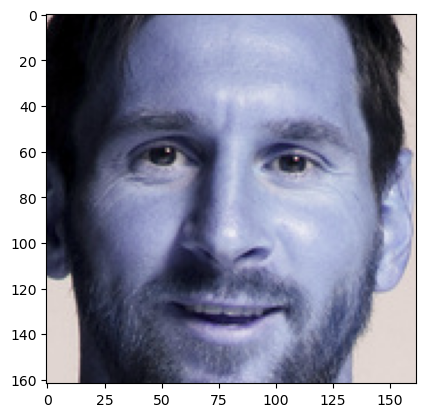

In [12]:
cropped_image = get_cropped_image('./test_image/MESSI.jpg')
plt.imshow(cropped_image)

In [13]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv.cvtColor( imArray,cv.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

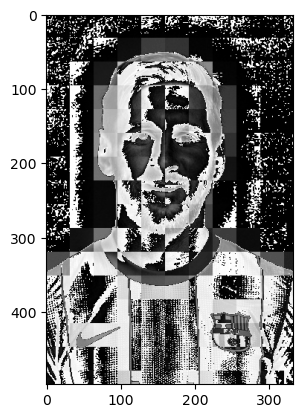

In [14]:
im_har = w2d(c_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [39]:
img =  cv.imread("./test_images/MESSI.jpg")
image_cop()
imgheight=img.shape[0]
imgwidth=img.shape[1]

AttributeError: 'NoneType' object has no attribute 'copy'

In [ ]:
M = 76
N = 104
x1 = 0
y1 = 0
 
for y in range(0, imgheight, M):
    for x in range(0, imgwidth, N):
        if (imgheight - y) < M or (imgwidth - x) < N:
            break
             
        y1 = y + M
        x1 = x + N
 
        # check whether the patch width or height exceeds the image width or height
        if x1 >= imgwidth and y1 >= imgheight:
            x1 = imgwidth - 1
            y1 = imgheight - 1
            #Crop into patches of size MxN
            tiles = image_copy[y:y+M, x:x+N]
            #Save each patch into file directory
            cv2.imwrite('saved_patches/'+'tile'+str(x)+'_'+str(y)+'.jpg', tiles)
            cv2.rectangle(img, (x, y), (x1, y1), (0, 255, 0), 1)
        elif y1 >= imgheight: # when patch height exceeds the image height
            y1 = imgheight - 1
            #Crop into patches of size MxN
            tiles = image_copy[y:y+M, x:x+N]
            #Save each patch into file directory
            cv2.imwrite('saved_patches/'+'tile'+str(x)+'_'+str(y)+'.jpg', tiles)
            cv2.rectangle(img, (x, y), (x1, y1), (0, 255, 0), 1)
        elif x1 >= imgwidth: # when patch width exceeds the image width
            x1 = imgwidth - 1
            #Crop into patches of size MxN
            tiles = image_copy[y:y+M, x:x+N]
            #Save each patch into file directory
            cv2.imwrite('saved_patches/'+'tile'+str(x)+'_'+str(y)+'.jpg', tiles)
            cv2.rectangle(img, (x, y), (x1, y1), (0, 255, 0), 1)
        else:
            #Crop into patches of size MxN
            tiles = image_copy[y:y+M, x:x+N]
            #Save each patch into file directory
            cv2.imwrite('saved_patches/'+'tile'+str(x)+'_'+str(y)+'.jpg', tiles)
            cv2.rectangle(img, (x, y), (x1, y1), (0, 255, 0), 1)

